In [71]:
import statistics
import matplotlib.pyplot as plt
import pandas as pd
import random

In [72]:
file_input =\
open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\cnn_user_pref_legal\inputs-8445-.dev.txt',
                        'r', encoding="mbcs")
file_pred =\
open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\cnn_user_pref_legal\predictions-8445-.dev.txt',
                         'r', encoding="mbcs")
file_targ =\
open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\cnn_user_pref_legal\targets-8445-.dev.txt',
                         'r', encoding="mbcs")

inputs = file_input.readlines()
pred   = file_pred.readlines()
targ   = file_targ.readlines()

file_input.close()
file_pred.close()
file_targ.close()

In [73]:
inputs[0]

'-----:0\n'

In [74]:
text_in = []
for line in inputs:
    if line[0] != '-' and line[0] != '[':
        line = line.strip('\n')
        text_in.append(line)

In [76]:
for k,text in enumerate(text_in):
    if text[:30]=='Short. A butcher whose country':
        print(k)

In [77]:
text_in[22]

'Short. please be aware that we may transfer your information to israel the european union and other countries through certain third parties that we use to operate and manage the site and services including amazon web services aws or google cloud services.'

In [78]:
summaries = []
for line in pred:
    if line[0] != '-':
        line = line.strip('\n')
        summaries.append(line)   
        
targets = []
for line in targ:
    if line[0] != '-':
        line = line.strip('\n')
        targets.append(line)   

In [79]:
print(summaries[0])
len(summaries[0].split(' '))

device information as described below we collect information from and about the computers phones connected tvs and other web connected devices you use . for example we use information collected about your use of our products on another device such as your laptop or tablet or to measure whether you took an action in response to an ad we showed you on your phone on a different device .


69

In [80]:
print(targets[0])
len(targets[0].split(' '))

collects all data you send username email credit card number any kind of info other put about you as well. plus all info about your device.


26

In [81]:
print(targets[22])
len(targets[22].split(' '))

your data may be processed and stored anywhere in the world.


11

In [82]:
print(summaries[22])
len(summaries[22].split(' '))

Short.


1

In [121]:
df = pd.DataFrame({'text':text_in, 'summary':summaries})
df[:10]

,text,summary
0,Short. device information as described below w...,device information as described below we colle...
1,Long. you agree that all disputes between you ...,you waive your right to participate in a class...
2,Short. we disclose such information to service...,twitch may disclose your personal information ...
3,Short. complaints if you wish to lodge a compl...,Short. complaints if you wish to lodge a compl...
4,Long. in addition content you delete may conti...,in addition content you delete may continue to...
5,Short. you agree that by entering into this ag...,Short.
6,Long. in some circumstances your information m...,in some circumstances your information may be ...
7,Short. you give us permission to use your name...,Short.
8,Short. you own the content you create and shar...,Short.
9,Long. all our email communications to you will...,all our email communications to you will conta...


In [84]:
# delete rows with where summary is "Short"
df = df[df.summary != 'Short.']
df.reset_index(inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    66 non-null     int64 
 1   text     66 non-null     object
 2   summary  66 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.7+ KB


In [87]:
df['keyword']=df['text'].str.slice(0,5)
df['text_len']= [ len(x.split(' ')) for x in df['text']]
df['summ_len']= [ len(x.split(' ')) for x in df['summary']]

In [114]:
df[:60]

,index,text,summary,keyword,text_len,summ_len
0,0,Short. device information as described below w...,device information as described below we colle...,Short,332,69
1,1,Long. you agree that all disputes between you ...,you waive your right to participate in a class...,Long.,33,16
2,2,Short. we disclose such information to service...,twitch may disclose your personal information ...,Short,136,10
3,3,Short. complaints if you wish to lodge a compl...,Short. complaints if you wish to lodge a compl...,Short,90,27
4,4,Long. in addition content you delete may conti...,in addition content you delete may continue to...,Long.,23,138
5,6,Long. in some circumstances your information m...,in some circumstances your information may be ...,Long.,64,42
6,9,Long. all our email communications to you will...,all our email communications to you will conta...,Long.,12,10
7,10,Long. this policy was last updated on 1 june 2...,this policy was last updated on 1 june 2018 an...,Long.,16,16
8,11,Long. unless otherwise agreed to in a written ...,"twitch grants you a perpetual, worldwide, roya...",Long.,150,16
9,12,Long. if you seek to file a legal claim agains...,you agree to file a legal claim against us in ...,Long.,119,73


In [89]:
idx = pd.Index(df['text'])
idx.get_loc('Long. device information as described below we collect information from and about the computers phones connected tvs and other web connected devices you use that integrate with our products and we combine this information across different devices you use. for example we use information collected about your use of our products on your phone to better personalize the content including ads or features you see when you use our products on another device such as your laptop or tablet or to measure whether you took an action in response to an ad we showed you on your phone on a different device. information we obtain from these devices includes device attributes information such as the operating system hardware and software versions battery level signal strength available storage space browser type app and file names and types and plugins. device operations information about operations and behaviors performed on the device such as whether a window is foregrounded or backgrounded or mouse movements which can help distinguish humans from bots. identifiers unique identifiers device ids and other identifiers such as from games apps or accounts you use and family device ids or other identifiers unique to facebook company products associated with the same device or account. device signals bluetooth signals and information about nearby wi fi access points beacons and cell towers. data from device settings information you allow us to receive through device settings you turn on such as access to your gps location camera or photos. network and connections information such as the name of your mobile operator or isp language time zone mobile phone number ip address connection speed and in some cases information about other devices that are nearby or on your network so we can do things like help you stream a video from your phone to your tv. cookie data data from cookies stored on your device including cookie ids and settings. learn more about how we use cookies in the facebook cookies policy and instagram cookies policy.') 

35

In [119]:
print(df['text'][12],'\n')
print(df['summ_len'][12])
print(df['summary'][12])

Long. sharing with third party partners we work with third party partners who help us provide and improve our products or who use facebook business tools to grow their businesses which makes it possible to operate our companies and provide free services to people around the world. we don t sell any of your information to anyone and we never will. we also impose strict restrictions on how our partners can use and disclose the data we provide. here are the types of third parties we share information with partners who use our analytics services. we provide aggregated statistics and insights that help people and businesses understand how people are engaging with their posts listings pages videos and other content on and off the facebook products. for example page admins and instagram business profiles receive information about the number of people or accounts who viewed reacted to or commented on their posts as well as aggregate demographic and other information that helps them understand 

In [120]:
print(df['text'][59],'\n')
print(df['summ_len'][59])
print(df['summary'][59])

Short. sharing with third party partners we work with third party partners who help us provide and improve our products or who use facebook business tools to grow their businesses which makes it possible to operate our companies and provide free services to people around the world. we don t sell any of your information to anyone and we never will. we also impose strict restrictions on how our partners can use and disclose the data we provide. here are the types of third parties we share information with partners who use our analytics services. we provide aggregated statistics and insights that help people and businesses understand how people are engaging with their posts listings pages videos and other content on and off the facebook products. for example page admins and instagram business profiles receive information about the number of people or accounts who viewed reacted to or commented on their posts as well as aggregate demographic and other information that helps them understand

In [117]:
print(df['text'][25],'\n')
print(df['summary'][25])
print(df['summ_len'][25])

Short. for example when you go to a website with a like button we need to know who you are in order to show you what your facebook friends have liked on that site. the data we receive includes your user id the website you re visiting the date and time and other browser related info. if you re logged out or don t have a facebook account and visit a website with the like button or another social plugin your browser sends us a more limited set of info. for example because you re not logged into facebook you ll have fewer cookies than someone who s logged in. like other sites on the internet we receive info about the web page you re visiting the date and time and other browser related info. we record this info to help us improve our products. as our data policy indicates we use cookies to show you ads on and off facebook. we may also use the info we receive when you visit a site with social plugins to help us show you more interesting and useful ads. 

for example when you go to a website 

In [118]:
print(df['text'][58], '\n')
print(df['summary'][58])
print(df['summ_len'][58])

Long. for example when you go to a website with a like button we need to know who you are in order to show you what your facebook friends have liked on that site. the data we receive includes your user id the website you re visiting the date and time and other browser related info. if you re logged out or don t have a facebook account and visit a website with the like button or another social plugin your browser sends us a more limited set of info. for example because you re not logged into facebook you ll have fewer cookies than someone who s logged in. like other sites on the internet we receive info about the web page you re visiting the date and time and other browser related info. we record this info to help us improve our products. as our data policy indicates we use cookies to show you ads on and off facebook. we may also use the info we receive when you visit a site with social plugins to help us show you more interesting and useful ads. 

the data we receive includes your user

In [94]:
df['keyword'].value_counts()

Long.    45
Short    21
Name: keyword, dtype: int64

(array([24., 24., 10.,  4.,  0.,  0.,  2.,  0.,  0.,  2.]),
 array([ 12. ,  60.9, 109.8, 158.7, 207.6, 256.5, 305.4, 354.3, 403.2,
        452.1, 501. ]),
 <BarContainer object of 10 artists>)

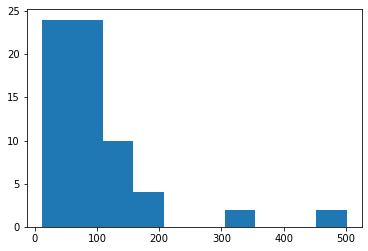

In [95]:
plt.hist(df['text_len'])

In [96]:
df.groupby(['keyword']).mean()['summ_len']

keyword
Long.    52.177778
Short    21.190476
Name: summ_len, dtype: float64

In [97]:
df_long  = df[df['keyword']=='Long.']
df_short = df[df['keyword']=='Short']

In [98]:
df_long['keyword'].value_counts()

Long.    45
Name: keyword, dtype: int64

In [99]:
df_short['keyword'].value_counts()

Short    21
Name: keyword, dtype: int64

In [100]:
df_long['summ_len'].mean()

52.17777777777778

In [101]:
df_short['summ_len'].mean()

21.19047619047619

In [102]:
longs = list(df_long['summ_len'])
type(longs)

list

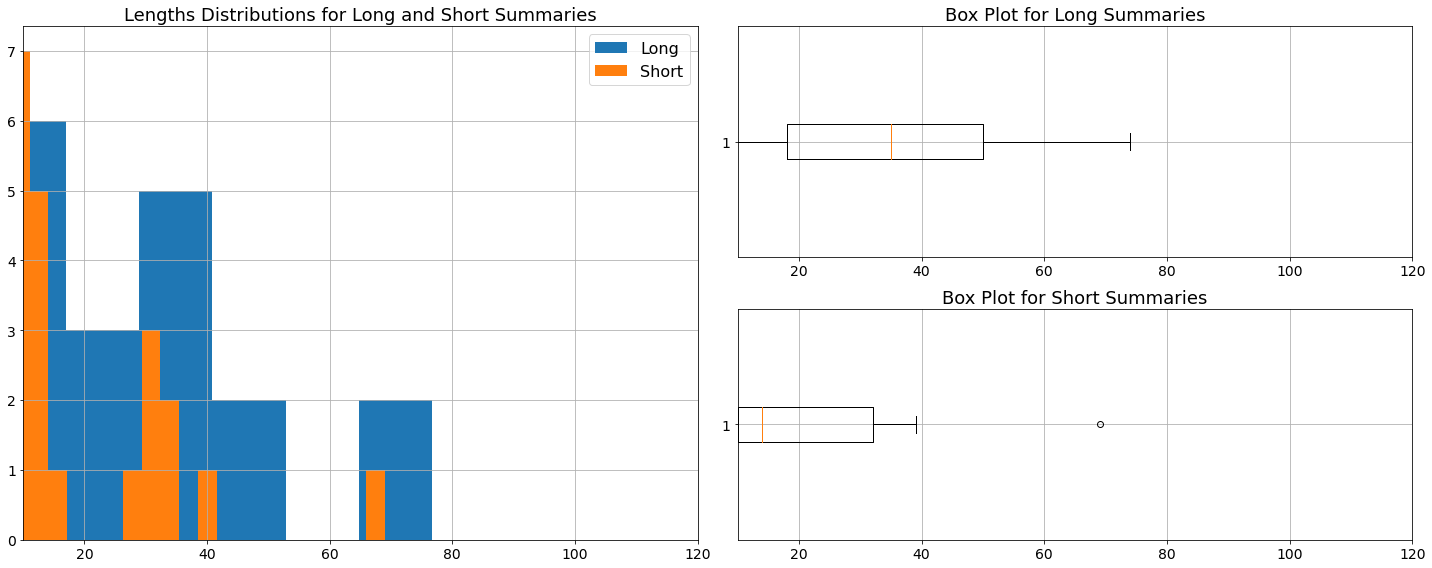

In [103]:

fig = plt.figure(figsize=(20,8))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])

ax1.grid()
ax2.grid()
ax3.grid()

ax1.hist(random.sample(longs,21), bins=20, label='Long')
ax1.hist(df_short['summ_len'], bins=20, label='Short')
ax1.set_title('Lengths Distributions for Long and Short Summaries',fontsize=18)
ax1.legend(fontsize=16)

ax2.boxplot(df_long['summ_len'], vert=False,)
ax2.set_title('Box Plot for Long Summaries',fontsize=18)

ax3.boxplot(df_short['summ_len'],vert=False,)
ax3.set_title('Box Plot for Short Summaries',fontsize=18)

for tick in ax1.xaxis.get_major_ticks(): tick.label.set_fontsize(14)
for tick in ax2.xaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax3.xaxis.get_major_ticks(): tick.label.set_fontsize(14)
    
for tick in ax1.yaxis.get_major_ticks(): tick.label.set_fontsize(14)
for tick in ax2.yaxis.get_major_ticks(): tick.label.set_fontsize(14) 
for tick in ax3.yaxis.get_major_ticks(): tick.label.set_fontsize(14) 

ax1.set_xlim(10,120)
ax2.set_xlim(10,120)
ax3.set_xlim(10,120)

plt.tight_layout()

In [104]:
from scipy import stats

In [105]:
stats.ttest_ind(df_long['summ_len'], df_short['summ_len'], equal_var=False)

Ttest_indResult(statistic=3.300386469881325, pvalue=0.0017018056528959533)